# Comparison of Classification Models

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, tree
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../data/model/model.csv')

1    0.606383
0    0.393617
Name: success, dtype: float64


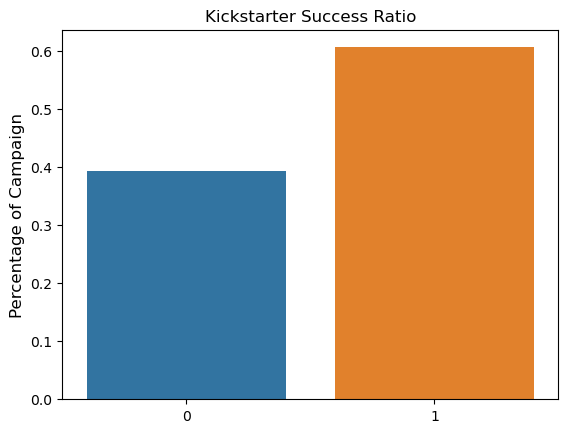

In [6]:
target = df.success.value_counts(normalize=True) 
print(target)
sns.barplot(x = target.index, y = target.values)
plt.title('Kickstarter Success Ratio')
plt.ylabel('Percentage of Campaign', fontsize=12);

In [7]:
df.columns

Index(['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
       'description_length', 'staff_pick_True', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object')

In [8]:
df.rename(columns={'main_category_Comics': 'Comics',
                   'main_category_Crafts': 'Crafts', 
                   'main_category_Dance': 'Dance', 
                   'main_category_Design': 'Design',
                   'main_category_Fashion': 'Fashion', 
                   'main_category_Film & Video': 'Film_Video',
                   'main_category_Food': 'Food', 
                   'main_category_Games': 'Games', 
                   'main_category_Journalism': 'Journalism',
                   'main_category_Music': 'Music', 
                   'main_category_Photography': 'Photography',
                   'main_category_Publishing': 'Publishing', 
                   'main_category_Technology': 'Technology',
                   'main_category_Theater': 'Theater'}, inplace=True)
df.columns

Index(['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
       'description_length', 'staff_pick_True', 'Comics', 'Crafts', 'Dance',
       'Design', 'Fashion', 'Film_Video', 'Food', 'Games', 'Journalism',
       'Music', 'Photography', 'Publishing', 'Technology', 'Theater'],
      dtype='object')

In [9]:
X, y = df.drop(['success'], axis=1), df.success

X_mid, X_test, y_mid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

In [10]:
def make_confusion_matrix(model, threshold=0.6):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_sc)[:,1] >=threshold)
    success_confusion = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(success_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['fail','success'],
           yticklabels=['fail','success']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

<h1> Logistic Regression </h1>

In [12]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_val_sc)

lr_ac = lr.score(X_val_sc, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59     12559
           1       0.72      0.85      0.78     18993

    accuracy                           0.72     31552
   macro avg       0.71      0.68      0.68     31552
weighted avg       0.71      0.72      0.70     31552



In [13]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

Logistic Regression validation metrics: 
 Accuracy: 0.7156 
 Precision: 0.7232 
 Recall: 0.8548 
 F1: 0.7835


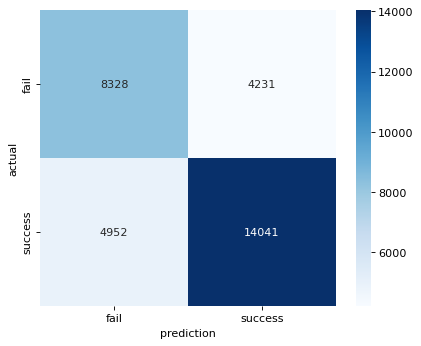

In [14]:
make_confusion_matrix(lr)

In [15]:
lr_y_score = lr.predict_proba(X_val_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_val, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)
print(roc_auc_lr)

0.7737506725848897


<h1> KNN </h1>

In [17]:
# initiate model and calculate error metrics
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
knn_pred = knn.predict(X_val_sc)
knn_confusion = confusion_matrix(y_val,knn_pred)

knn_ac = knn.score(X_val_sc, y_val)
knn_precision = precision_score(y_val, knn_pred)
knn_recall = recall_score(y_val, knn_pred)
knn_f1 = f1_score(y_val, knn_pred)

print(classification_report(y_val, knn_pred))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59     12559
           1       0.72      0.78      0.75     18993

    accuracy                           0.69     31552
   macro avg       0.68      0.67      0.67     31552
weighted avg       0.69      0.69      0.69     31552



In [18]:
print('KNN validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (knn_ac, 
         knn_precision, 
         knn_recall,
         knn_f1)
     )

KNN validation metrics: 
 Accuracy: 0.6904 
 Precision: 0.7245 
 Recall: 0.7838 
 F1: 0.7530


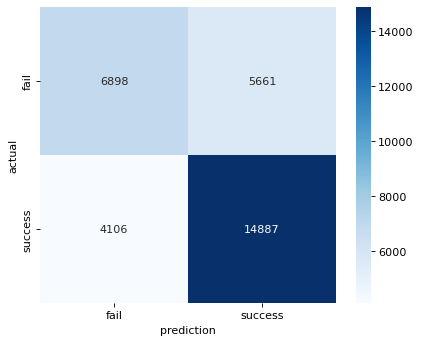

In [19]:
make_confusion_matrix(knn)

In [20]:
knn_y_score = knn.predict_proba(X_val_sc)[:,1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_val, knn_y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)
print(roc_auc_knn)

0.7289959212241277


<h1> Decision Tree </h1>

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)

dt_ac = dt.score(X_val, y_val)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred)

print(classification_report(y_val, dt_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59     12559
           1       0.73      0.72      0.72     18993

    accuracy                           0.67     31552
   macro avg       0.66      0.66      0.66     31552
weighted avg       0.67      0.67      0.67     31552



In [23]:
print('Decision Tree validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (dt_ac, 
         dt_precision, 
         dt_recall,
         dt_f1)
     )

Decision Tree validation metrics: 
 Accuracy: 0.6693 
 Precision: 0.7279 
 Recall: 0.7196 
 F1: 0.7237


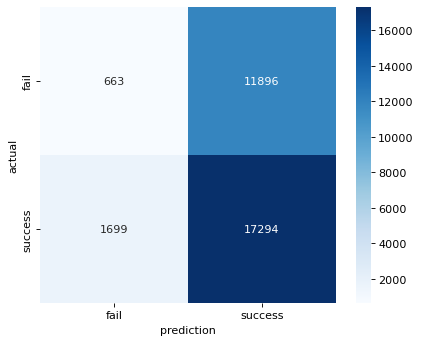

In [24]:
make_confusion_matrix(dt)

In [25]:
dt_y_score = dt.predict_proba(X_val)[:, 1]
dt_fpr, dt_tpr, auc_thresholds = roc_curve(y_val, dt_y_score)
roc_auc_dt = auc(dt_fpr, dt_tpr)
print(roc_auc_dt)

0.6568348126061019


<h1> Random Forest </h1>

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_confusion = confusion_matrix(y_val, rf_pred)

rf_ac = rf.score(X_val, y_val)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred)

print(classification_report(y_val, rf_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.65     12559
           1       0.76      0.82      0.79     18993

    accuracy                           0.74     31552
   macro avg       0.73      0.71      0.72     31552
weighted avg       0.73      0.74      0.73     31552



In [29]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (rf_ac, 
         rf_precision, 
         rf_recall,
         rf_f1)
     )

Random Forest validation metrics: 
 Accuracy: 0.7361 
 Precision: 0.7588 
 Recall: 0.8233 
 F1: 0.7897


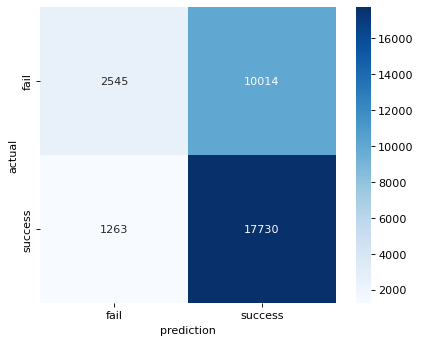

In [30]:
make_confusion_matrix(rf)

In [31]:
rf_y_score = rf.predict_proba(X_val)[:, 1]
rf_fpr, rf_tpr, auc_thresholds = roc_curve(y_val, rf_y_score)
roc_auc_rf = auc(rf_fpr, rf_tpr)
print(roc_auc_rf)

0.79593903046247


<h1> Naive Bayes </h1>

In [32]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_val)
gnb_confusion = confusion_matrix(y_val, gnb_pred)

gnb_ac = gnb.score(X_val, y_val)
gnb_precision = precision_score(y_val, gnb_pred)
gnb_recall = recall_score(y_val, gnb_pred)
gnb_f1 = f1_score(y_val, gnb_pred)

print(classification_report(y_val, gnb_pred))

              precision    recall  f1-score   support

           0       0.85      0.08      0.14     12559
           1       0.62      0.99      0.76     18993

    accuracy                           0.63     31552
   macro avg       0.73      0.53      0.45     31552
weighted avg       0.71      0.63      0.51     31552



In [33]:
print('Gaussian validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (gnb_ac, 
         gnb_precision, 
         gnb_recall,
         gnb_f1)
     )

Gaussian validation metrics: 
 Accuracy: 0.6266 
 Precision: 0.6185 
 Recall: 0.9911 
 F1: 0.7616


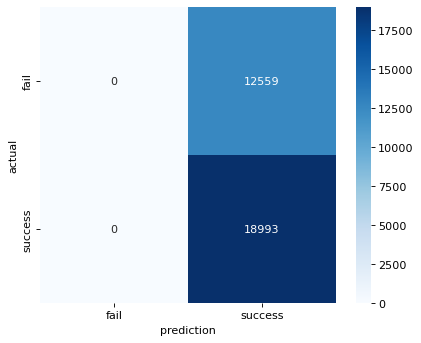

In [34]:
make_confusion_matrix(gnb)

In [35]:
gnb_y_score = gnb.predict_proba(X_val)[:, 1]
gnb_fpr, gnb_tpr, auc_thresholds = roc_curve(y_val, gnb_y_score)
roc_auc_gnb = auc(gnb_fpr, gnb_tpr)
print(roc_auc_gnb)

0.6466601738147966


In [36]:
bnb = naive_bayes.BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_val)
bnb_confusion = confusion_matrix(y_val, gnb_pred)

bnb_ac = gnb.score(X_val, y_val)
bnb_precision = precision_score(y_val, bnb_pred)
bnb_recall = recall_score(y_val, bnb_pred)
bnb_f1 = f1_score(y_val, bnb_pred)

print(classification_report(y_val, bnb_pred))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58     12559
           1       0.72      0.81      0.76     18993

    accuracy                           0.70     31552
   macro avg       0.68      0.67      0.67     31552
weighted avg       0.69      0.70      0.69     31552



In [37]:
print('Bernoulli validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (bnb_ac, 
         bnb_precision, 
         bnb_recall,
         bnb_f1)
     )

Bernoulli validation metrics: 
 Accuracy: 0.6266 
 Precision: 0.7199 
 Recall: 0.8112 
 F1: 0.7628


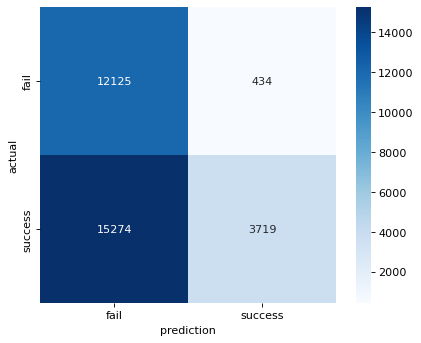

In [38]:
make_confusion_matrix(bnb)

In [39]:
bnb_y_score = bnb.predict_proba(X_val)[:, 1]
bnb_fpr, bnb_tpr, auc_thresholds = roc_curve(y_val, bnb_y_score)
roc_auc_bnb = auc(bnb_fpr, bnb_tpr)
print(roc_auc_bnb)

0.7321761697571121


<h1> XGBoost </h1>

In [43]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_val)

xg_ac = xg.score(X_val, y_val)
xg_precision = precision_score(y_val, xg_pred)
xg_recall = recall_score(y_val, xg_pred)
xg_f1 = f1_score(y_val, xg_pred)

xg_y_score = xg.predict_proba(X_val)[:, 1]
xg_fpr, xg_tpr, auc_thresholds = roc_curve(y_val, xg_y_score)
roc_auc_xg = auc(xg_fpr, xg_tpr)

print(classification_report(y_val, xg_pred))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     12559
           1       0.77      0.86      0.81     18993

    accuracy                           0.76     31552
   macro avg       0.75      0.73      0.74     31552
weighted avg       0.75      0.76      0.75     31552



In [44]:
print('XGBoost validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xg_ac, 
         xg_precision, 
         xg_recall,
         xg_f1,
         roc_auc_xg)
     )

XGBoost validation metrics: 
 Accuracy: 0.7568 
 Precision: 0.7672 
 Recall: 0.8557 
 F1: 0.8090 
 ROC: 0.8238


In [45]:
confusion_matrix(y_val, xg_pred)

array([[ 7627,  4932],
       [ 2740, 16253]])

<h1> Models ROC Curve comparison </h1>

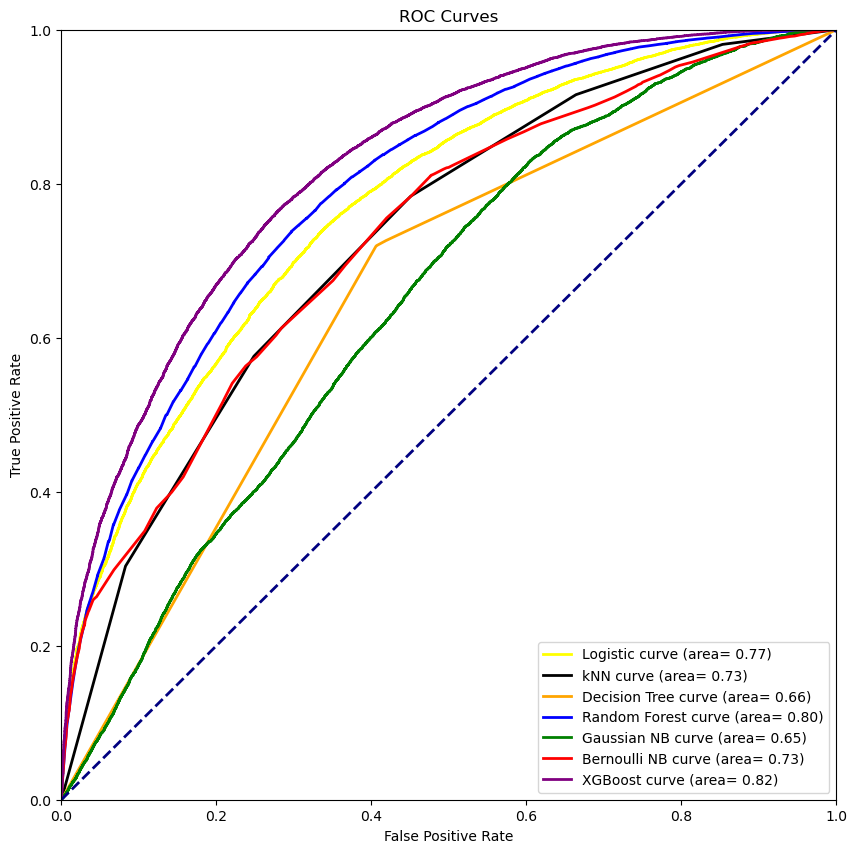

In [47]:
# all models ROC Curve comparison
plt.figure(figsize=(10,10))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='yellow', lw=lw, 
         label='Logistic curve (area= %0.2f)' %roc_auc_lr)
plt.plot(knn_fpr, knn_tpr, color='black', lw=lw, 
         label='kNN curve (area= %0.2f)' %roc_auc_knn)
plt.plot(dt_fpr, dt_tpr, color='orange', lw=lw, 
         label='Decision Tree curve (area= %0.2f)' %roc_auc_dt)
plt.plot(rf_fpr, rf_tpr, color='blue', lw=lw, 
         label='Random Forest curve (area= %0.2f)' %roc_auc_rf)
plt.plot(gnb_fpr, gnb_tpr, color='green', lw=lw, 
         label='Gaussian NB curve (area= %0.2f)' %roc_auc_gnb)
plt.plot(bnb_fpr, bnb_tpr, color='red', lw=lw, 
         label='Bernoulli NB curve (area= %0.2f)' %roc_auc_bnb)
plt.plot(xg_fpr, xg_tpr, color='purple', lw=lw,
        label='XGBoost curve (area= %0.2f)' %roc_auc_xg)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right');

### XGBoost has the highest AUC(Area Under the Curve) score

<h1> Tests </h1>

In [49]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_mid)
X_test_sc = scaler.transform(X_test)

In [51]:
# test score on all models

##Logistic Regression
lr.fit(X_sc, y_mid)
lr_pred = lr.predict(X_test_sc)

lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

##KNN
knn.fit(X_sc, y_mid)
knn_pred = knn.predict(X_test_sc)
knn_confusion = confusion_matrix(y_test,knn_pred)

knn_ac = knn.score(X_test_sc, y_test)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

knn_y_score = knn.predict_proba(X_test_sc)[:,1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_test, knn_y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)

##Decision Tree
dt.fit(X_mid, y_mid)
dt_pred = dt.predict(X_test)

dt_ac = dt.score(X_test, y_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

dt_y_score = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, auc_thresholds = roc_curve(y_test, dt_y_score)
roc_auc_dt = auc(dt_fpr, dt_tpr)

##Random Forest
rf.fit(X_mid, y_mid)
rf_pred = rf.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_pred)

rf_ac = rf.score(X_test, y_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

rf_y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, auc_thresholds = roc_curve(y_test, rf_y_score)
roc_auc_rf = auc(rf_fpr, rf_tpr)

##Gaussian NB
gnb.fit(X_mid, y_mid)
gnb_pred = gnb.predict(X_test)
gnb_confusion = confusion_matrix(y_test, gnb_pred)

gnb_ac = gnb.score(X_test, y_test)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_f1 = f1_score(y_test, gnb_pred)

gnb_y_score = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, auc_thresholds = roc_curve(y_test, gnb_y_score)
roc_auc_gnb = auc(gnb_fpr, gnb_tpr)

##Bernoulli NB
bnb.fit(X_mid, y_mid)
bnb_pred = bnb.predict(X_test)
bnb_confusion = confusion_matrix(y_test, bnb_pred)

bnb_ac = bnb.score(X_test, y_test)
bnb_precision = precision_score(y_test, bnb_pred)
bnb_recall = recall_score(y_test, bnb_pred)
bnb_f1 = f1_score(y_test, bnb_pred)

bnb_y_score = bnb.predict_proba(X_test)[:, 1]
bnb_fpr, bnb_tpr, auc_thresholds = roc_curve(y_test, bnb_y_score)
roc_auc_bnb = auc(bnb_fpr, bnb_tpr)

##XGBoost
xg.fit(X_mid, y_mid)
xg_pred = xg.predict(X_test)

xg_ac = xg.score(X_test, y_test)
xg_precision = precision_score(y_test, xg_pred)
xg_recall = recall_score(y_test, xg_pred)
xg_f1 = f1_score(y_test, xg_pred)

xg_y_score = xg.predict_proba(X_test)[:, 1]
xg_fpr, xg_tpr, auc_thresholds = roc_curve(y_test, xg_y_score)
roc_auc_xg = auc(xg_fpr, xg_tpr)

In [52]:
col_list = ['Model_type','accuracy', 'precision', 'recall', 'f1', 'roc']
lr_dict = dict(zip(col_list, ['Logistic', lr_ac, lr_precision, lr_recall, lr_f1, roc_auc_lr]))
knn_dict = dict(zip(col_list, ['KNN', knn_ac, knn_precision, knn_recall, knn_f1, roc_auc_knn]))
dt_dict = dict(zip(col_list, ['Decision Tree', dt_ac, dt_precision, dt_recall, dt_f1, roc_auc_dt]))
rf_dict = dict(zip(col_list, ['Random Forest', rf_ac, rf_precision, rf_recall, rf_f1, roc_auc_rf]))
gnb_dict = dict(zip(col_list, ['Gaussian', gnb_ac, gnb_precision, gnb_recall, gnb_f1, roc_auc_gnb]))
bnb_dict = dict(zip(col_list, ['Bernoulli', bnb_ac, bnb_precision, bnb_recall, bnb_f1, roc_auc_bnb]))
xg_dict = dict(zip(col_list, ['XGBoost', xg_ac, xg_precision, xg_recall, xg_f1, roc_auc_xg]))

score_df = pd.DataFrame([knn_dict, lr_dict, dt_dict, rf_dict, gnb_dict, bnb_dict, xg_dict])
score_df

,Model_type,accuracy,precision,recall,f1,roc
0,KNN,0.695461,0.729276,0.790164,0.758500,0.735668
1,Logistic,0.715213,0.723881,0.855976,0.784406,0.773344
2,Decision Tree,0.664528,0.726711,0.714381,0.720493,0.651650
3,Random Forest,0.735827,0.761549,0.820410,0.789884,0.795849
4,Gaussian,0.629209,0.621540,0.990491,0.763794,0.644908
5,Bernoulli,0.692368,0.718666,0.808052,0.760742,0.730086
6,XGBoost,0.759888,0.770462,0.859285,0.812453,0.826736


In [53]:
score_df.to_csv('../data/score.csv')